# Machine Learning Project

## Bank Marketing Data Set

#### DATASET: https://archive.ics.uci.edu/ml/datasets/bank+marketing 

> • Question (1-4)

> > 1. What are the factors which are influencing the deals?
> > 2. should the marketing team continue their focus or they should change it
> > 3. Is the marketing result fruitful? 

> • Analysis (1-4)

> > We plan to use following models for Analysis
> > > 1. Logistics Regression
> > > 2. Random Forest Classifier
> > > 3. Linear Discriminant Analysis
> > > 4. K Nearest Neighbour

> • Conclusion (1-4)

> >

In [2]:
%matplotlib inline

import os
import numpy as np # importing numpy array
import pandas as pd # importing panda library
import seaborn as sns # importing seaborn, advanced of matplot
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

pd.options.display.max_rows = 30
sns.set(style='ticks', context='talk')

C:\Users\Akshat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#read_csv is a function in pandas used to read data from an csv file into a list of DataFrames
tables = pd.read_csv("C:/Users/Akshat/Desktop/ML/bank-full.csv",engine="python",index_col=False,sep=';\s*')
tables.head()


,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


# Information about our data

Input variables:
    bank client data:
1. - age (numeric)
2. - job : type of job 
3. - marital : marital status 
4. - education 
5. - default: has credit in default? 
6. - housing: has housing loan? 
7. - loan: has personal loan? 
8. - contact: contact communication type  
9. - month: last contact month of year 
10. - day_of_week: last contact day of the week
11. - duration: last contact duration, in seconds (numeric). 
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign 
16. - balance- balance of the customers
17. - deals, whether the calls/marketing resulted in getting a deal for the bank

# Data Cleaning

 1. remove all the " from columns

In [4]:
tables.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','deals']
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


In [5]:
tables['age']=tables.age.str.strip('"')
tables['job']=tables.job.str.strip('""')
tables['marital']=tables.marital.str.strip('""')
tables['education']=tables.education.str.strip('""')
tables['default']=tables.default.str.strip('""')
tables['housing']=tables.housing.str.strip('""')
tables['loan']=tables.loan.str.strip('""')
tables['contact']=tables.contact.str.strip('""')
tables['month']=tables.month.str.strip('""')
tables['poutcome']=tables.poutcome.str.strip('""')
tables['deals']=tables.deals.str.strip('""')
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
tables.shape

(45211, 17)

In [21]:
tables.dtypes

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deals        object
dtype: object

In [24]:
# We have to convert column age to numeric
tables['age']=pd.to_numeric(tables['age'])
tables['age'].dtype

dtype('int64')

In [7]:
tables.deals.unique()

array(['no', 'yes'], dtype=object)

<b> How many deals were successful? </b>

In [11]:
tables[tables.deals=='yes'].count()[1]

5289

<b> Success rate of the bank marketing? </b>

In [15]:
(5289/45211)*100

11.698480458295547

In [27]:
tables.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As seen from the data, the minimum age is <b>18</b> and the maximum age is <b>95</b>, with mean age being <b>41</b> 
and the balance range is also diverse with person being in debt and earning 100 grands 
</b>

# Data Analysis and Data Distribution

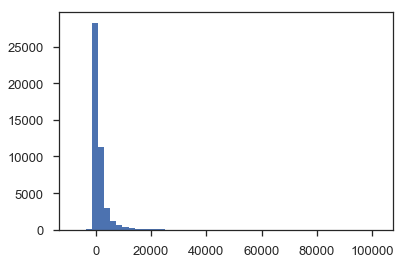

In [57]:
# Distriution of balance variable
plt.hist(tables.balance,bins=50)

plt.show()

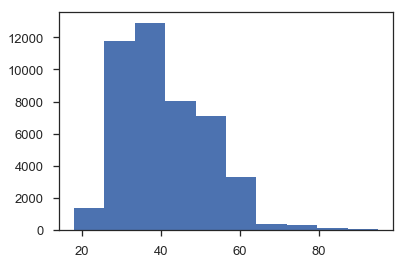

In [39]:
# Distriution of Age variable
plt.hist(tables.age,bins=10)
plt.show()

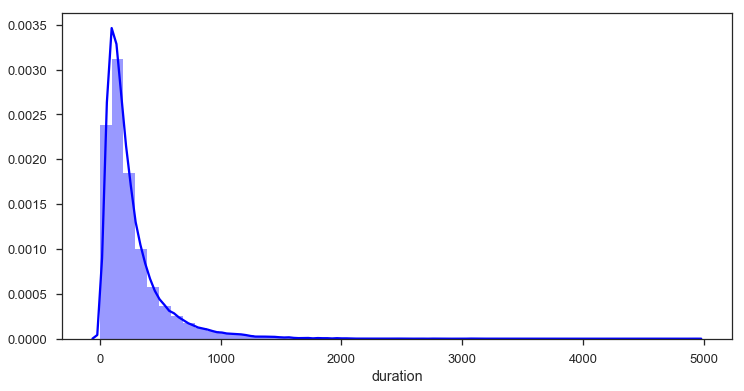

In [69]:
# Distriution of Duration variable
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(tables.duration,color='blue');

In [42]:
# Above data tells us that the data is highly skewed to the left

# Outlier Analysis of our predictor variable

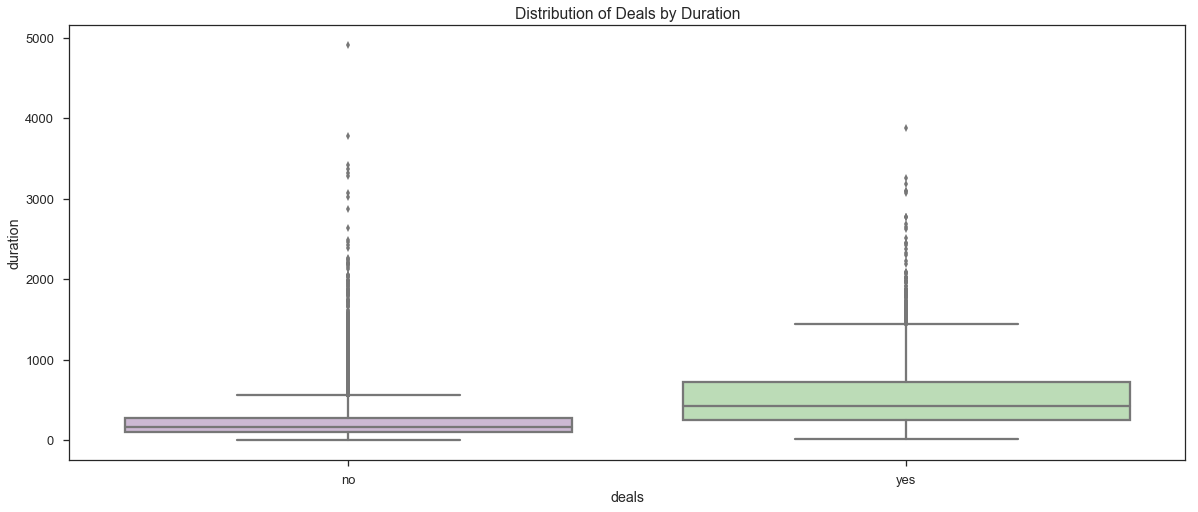

In [58]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="duration", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by Duration')

As we can see from the above graph, the distribution of deals with respect to age doesn't vary much

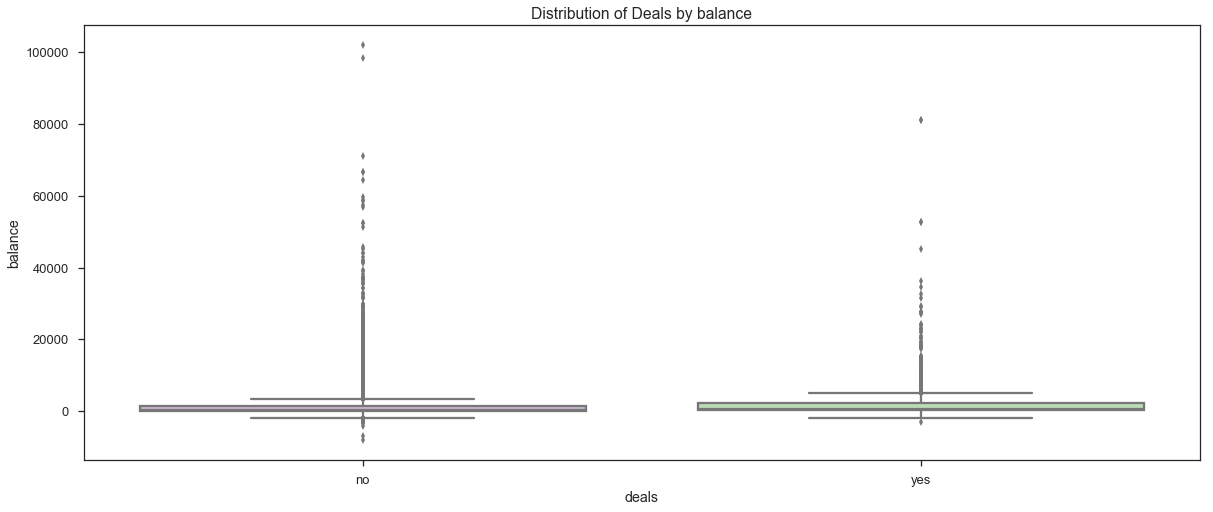

In [53]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="balance", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by balance')

Since our balance variable is highly skewed, above graph doesn't tell us anything

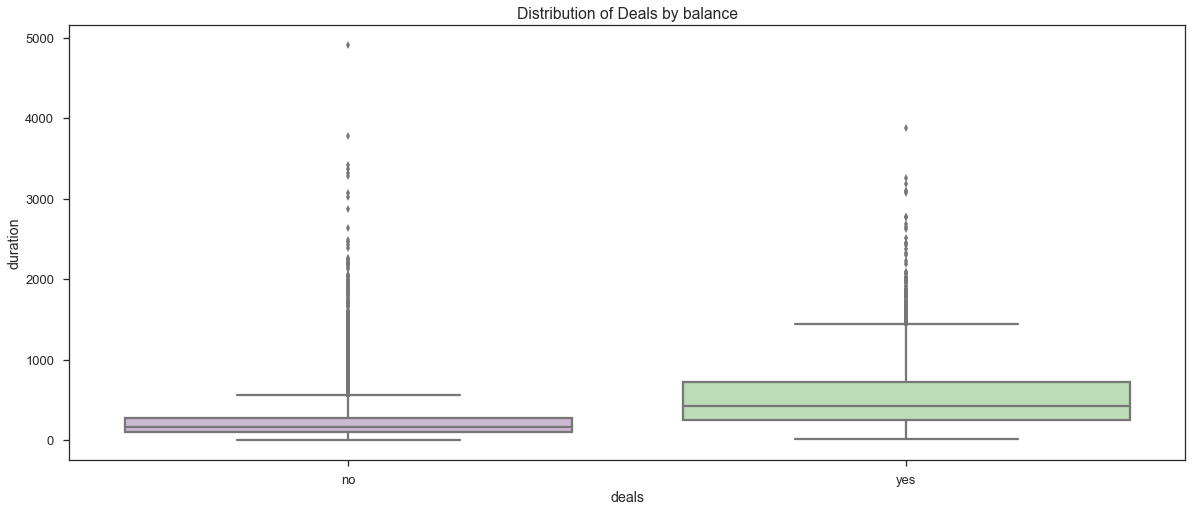

In [59]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="duration", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by balance')

General inference which we can get from this graph is, if the duration is high, then the deals were positive else negative

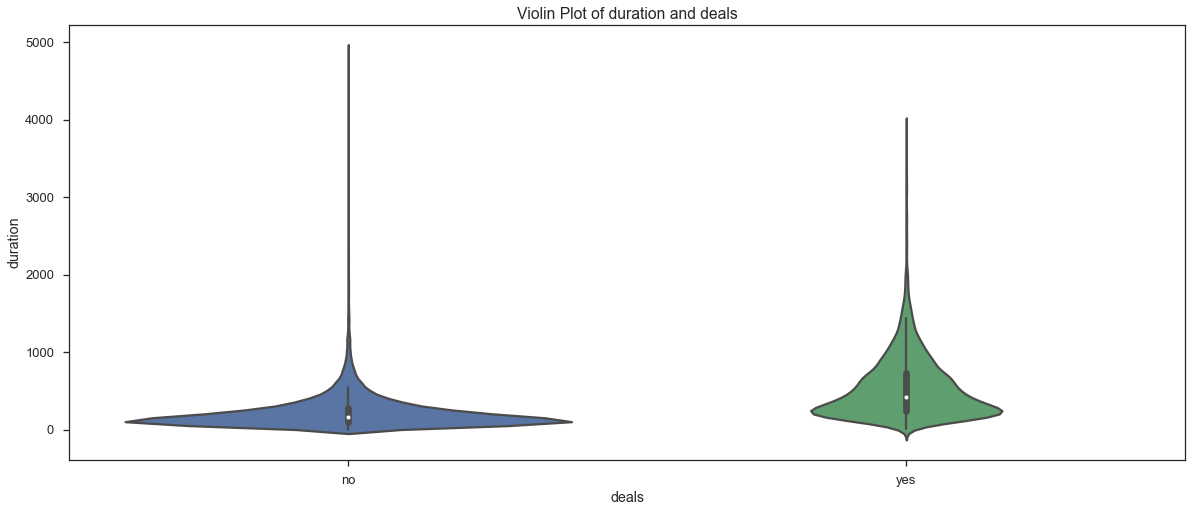

In [62]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.violinplot(x="deals", y="duration", data=tables)
ax.set_title('Violin Plot of duration and deals')

<b>Understading the relations between the variables</b>

C:\Users\Akshat\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


the corelation between these two variables are:  0.0215603804947


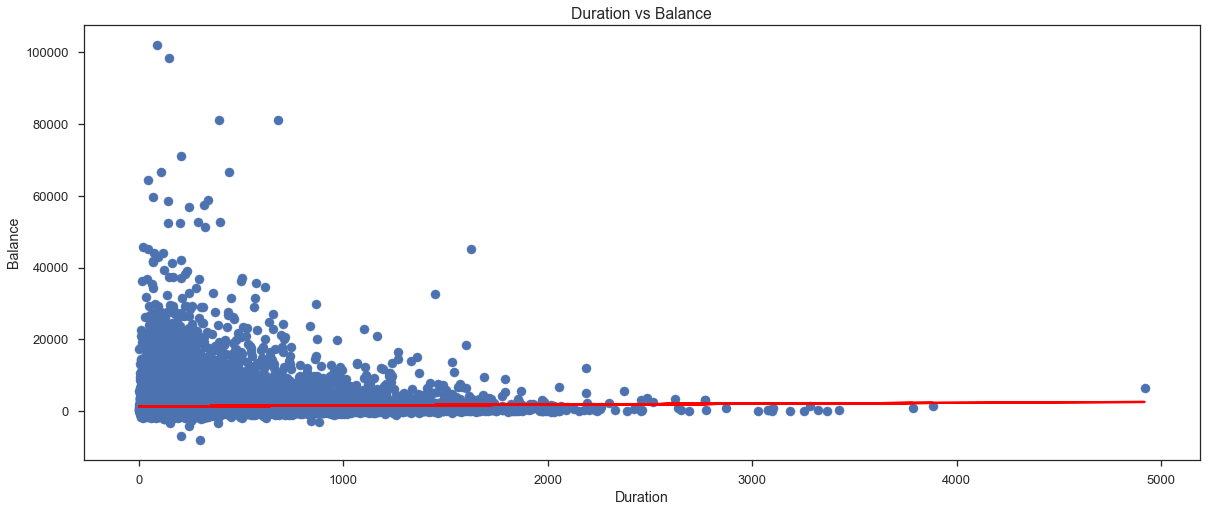

In [86]:
fig, ax = plt.subplots(figsize=(20,8))
fit = np.polyfit(tables.duration,tables.balance, deg=1)
ax.plot(tables.duration, fit[0] * tables.duration + fit[1], color='red')
plt.scatter(tables.duration,tables.balance)
plt.title('Duration vs Balance')
plt.xlabel('Duration')
plt.ylabel('Balance')
fig.show()
print('the corelation between these two variables are: ',pearsonr(tables.duration,tables.balance)[0])

C:\Users\Akshat\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


the corelation between these two variables are:  0.0215603804947


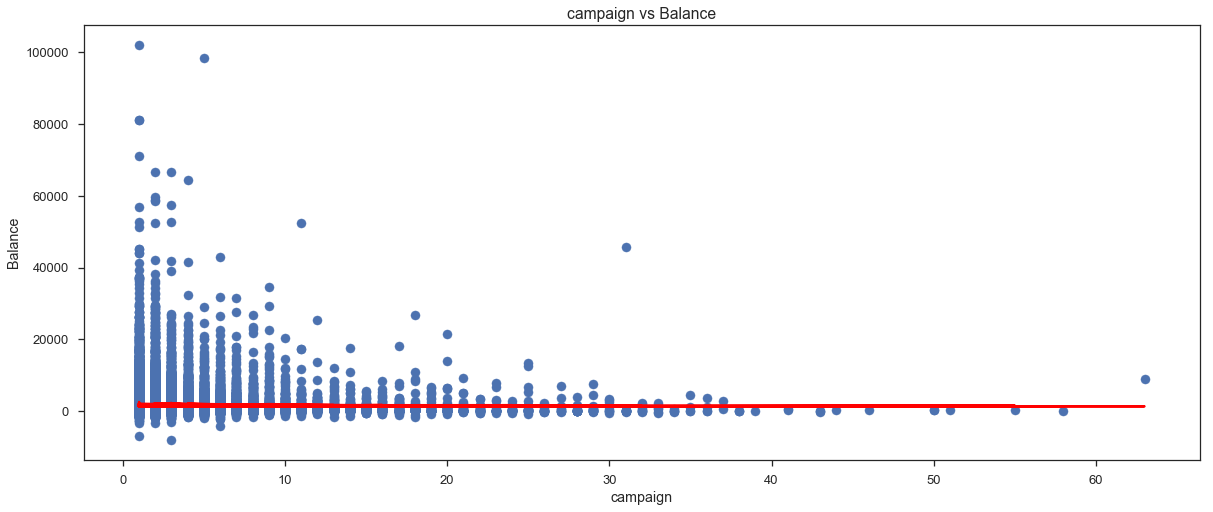

In [85]:
fig, ax = plt.subplots(figsize=(20,8))
fit = np.polyfit(tables.duration,tables.balance, deg=1)
ax.plot(tables.campaign, fit[0] * tables.duration + fit[1], color='red')
plt.scatter(tables.campaign,tables.balance)
plt.title('campaign vs Balance')
plt.xlabel('campaign')
plt.ylabel('Balance')
fig.show()
print('the corelation between these two variables are: ',pearsonr(tables.duration,tables.balance)[0])

In [87]:
# Like above, no relationship exists
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Questions to our data

<b>
1. What are the factors which are influencing the deals?
2. should the marketing team continue their focus or they should change it
3. Is the marketing result fruitful? 
</b>

Machine learning models
1. Logistics Regression
2. Random Forest Classifier
3. Linear Discriminant Analysis
4. K Nearest Neighbour

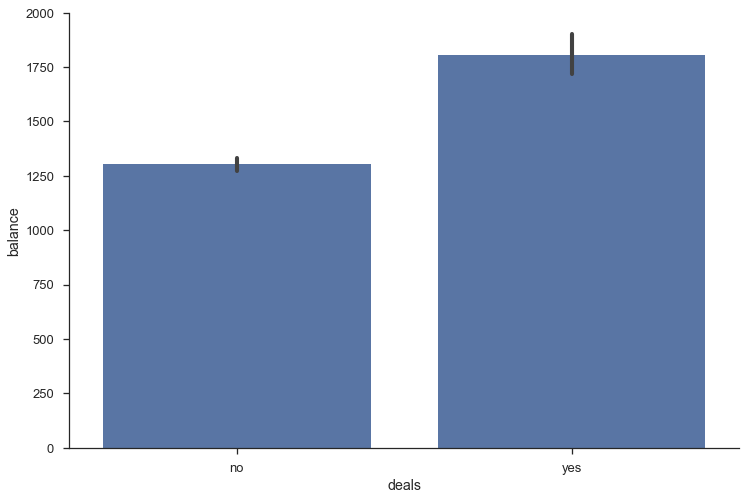

In [89]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='deals', y= 'balance', data=tables,
            color='#4c72b0', ax=ax)
sns.despine()

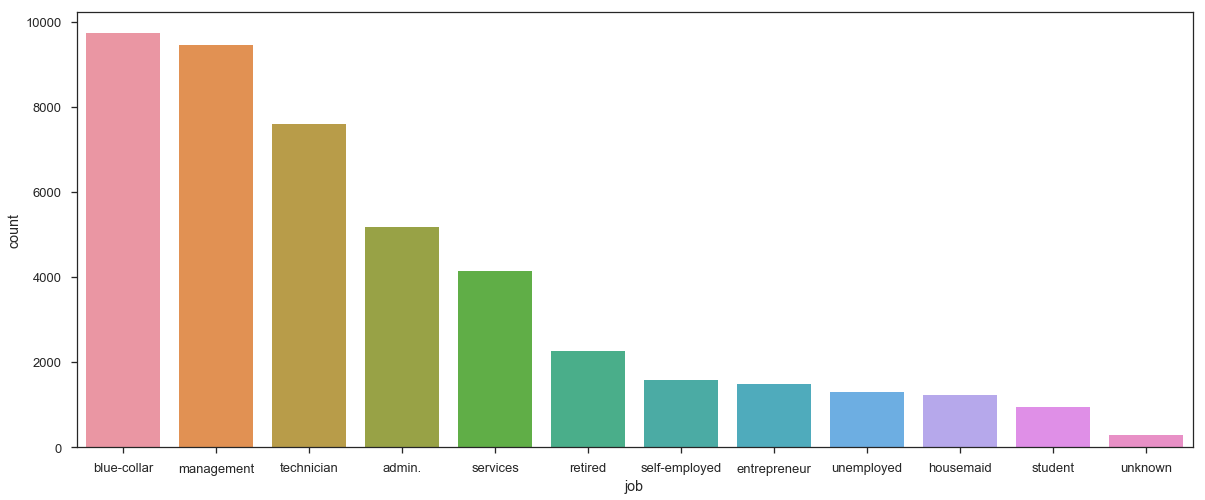

In [91]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot('job',data=tables,order = tables['job'].value_counts().index)

#### References:

> DATASET: https://archive.ics.uci.edu/ml/datasets/bank+marketing

> Dr Patrick Shafto

> http://scikit-learn.org/stable/modules/neighbors.html

> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


#### Team Members:
>> Akshat Shreemali (RUID:181009392)

>> Parth Bhatt (RUID:182003091)

>> Asher Dmello (RUID:180009385)

>> Vinayak Nayak (RUID:178009796)

>> Arka Samanta (RUID:182005401)

>>Pranav Bedekar (RUID:181002322)